<a href="https://colab.research.google.com/github/AngeLr721/ret_neuronal_con_keras/blob/master/red_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score

In [2]:
eta = 0.01
epochs = 30
batch_size = 10

In [3]:
dataset=mnist.load_data()

In [4]:
dat=np.array(dataset)
print(dat[1,1].shape)
(x_train, y_train), (x_test, y_test) = dataset

(10000,)


<ipython-input-4-d86b9ee74159>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dat=np.array(dataset)


In [5]:
x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv/=225
x_testv/=225

In [6]:
num_classes=10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_shape=(28*28,)))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=eta),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 24790 (96.84 KB)
Trainable params: 24790 (96.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

Epoch 1/30
6000/6000 [==============================] - 15s 2ms/step - loss: 0.1021 - accuracy: 0.1392 - val_loss: 0.0902 - val_accuracy: 0.2348
Epoch 2/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0899 - accuracy: 0.1789 - val_loss: 0.0897 - val_accuracy: 0.1494
Epoch 3/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0896 - accuracy: 0.1596 - val_loss: 0.0896 - val_accuracy: 0.1656
Epoch 4/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0895 - accuracy: 0.1870 - val_loss: 0.0895 - val_accuracy: 0.1847
Epoch 5/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0894 - accuracy: 0.1996 - val_loss: 0.0893 - val_accuracy: 0.2035
Epoch 6/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0892 - accuracy: 0.2173 - val_loss: 0.0892 - val_accuracy: 0.2082
Epoch 7/30
6000/6000 [==============================] - 9s 1ms/step - loss: 0.0891 - accuracy: 0.2145 - val_loss: 0.0890 - val_accuracy

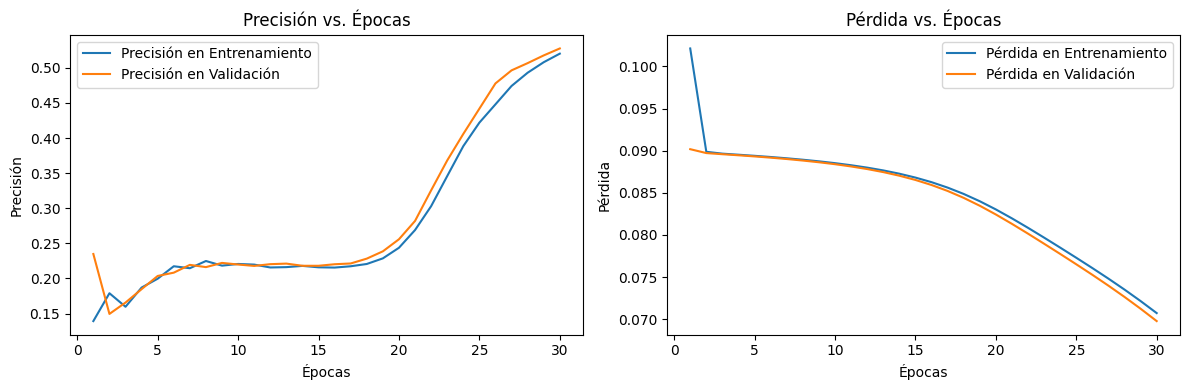

In [55]:
# Obtener la precisión y la pérdida del historial de entrenamiento
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear las gráficas
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Precisión en Entrenamiento')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Precisión en Validación')
plt.title('Precisión vs. Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Pérdida en Entrenamiento')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Pérdida en Validación')
plt.title('Pérdida vs. Épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [72]:
# Obtiene las métricas de entrenamiento y prueba
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Crea un DataFrame con las métricas
df = pd.DataFrame({
    'train_loss': train_loss,
    'train_accuracy': train_accuracy,
    'val_loss': val_loss,
    'val_accuracy': val_accuracy
})

# Guarda el DataFrame en un archivo CSV
csv_filename = '/content/metricas_entrenamiento_prueba.csv'  # Cambia la ruta según tus necesidades
df.to_csv(csv_filename, index=False)